Here we give an example of usage of SCDT./


We will give the limits of a city, in the form of a .json file, and obtain the dataframe for all Foursquare venues in that city. This will consist of two steps: 
(i) obtaining, given a seach radius, a set of points for which all the area of the city can be searched (implemented by the function 'make_grid'); and 
(ii) doing the Foursquare API search for those points and returning all venues in a single panda dataframe.

For more details, on how the algorithms work see https://github.com/PessoaP/ScrappingCityDataToolbox/blob/main/report.pdf

In [1]:
import json
import csv
from shapely.geometry import shape,Point
from geopy.geocoders import Nominatim 

from SCDT import *

radius = 400

In the same folder as this notebook, we need the boundaries of the city in .json format (in this case, for Buenos Aires, obteined from https://nominatim.openstreetmap.org/ui/details.html?osmtype=R&osmid=1224652&class=boundary) saved as     '{}.json'.format(cityfile)

In [2]:
cityfile = 'buenos_aires'

with open('{}.json'.format(cityfile),encoding="utf8") as json_data:
    city_data = json.load(json_data)

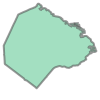

In [3]:
polygon = shape(city_data['geometry'])
polygon

Here we use the first relevant SCDT function, 'make_grid', this will return a set of points for which the API will be called later.

In [4]:
city_grid = make_grid(polygon,radius) ##SCDT function

0.8238636014210605
32 36


In [5]:
city_grid

[(-58.46359930253969, -34.705637),
 (-58.45743111186148, -34.705637),
 (-58.4697674932179, -34.700555252213604),
 (-58.46359930253969, -34.700555252213604),
 (-58.45743111186148, -34.700555252213604),
 (-58.45126292118327, -34.700555252213604),
 (-58.47593568389611, -34.695473504427206),
 (-58.4697674932179, -34.695473504427206),
 (-58.46359930253969, -34.695473504427206),
 (-58.45743111186148, -34.695473504427206),
 (-58.45126292118327, -34.695473504427206),
 (-58.48827206525253, -34.69039175664081),
 (-58.48210387457432, -34.69039175664081),
 (-58.47593568389611, -34.69039175664081),
 (-58.4697674932179, -34.69039175664081),
 (-58.46359930253969, -34.69039175664081),
 (-58.45743111186148, -34.69039175664081),
 (-58.45126292118327, -34.69039175664081),
 (-58.44509473050506, -34.69039175664081),
 (-58.49444025593074, -34.68531000885441),
 (-58.48827206525253, -34.68531000885441),
 (-58.48210387457432, -34.68531000885441),
 (-58.47593568389611, -34.68531000885441),
 (-58.4697674932179, 

The following 3 cells are *not* necessary for the present code to run.

They save the set of points produced by 'make_grid' as a csv file

In [6]:
with open('{}_grid.csv'.format(cityfile),'w',newline='') as file:
    output = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC)
    output.writerows(city_grid)

In [7]:
with open('{}_grid.csv'.format(cityfile),'r',newline='') as file:
    reader = csv.reader(file, quoting=csv.QUOTE_NONNUMERIC)
    city_grid_read = list(map(tuple, [map(float, row) for row in reader]))

In [8]:
city_grid = city_grid_read

Now, we set the Foursquare credentials

In [9]:
ID = 
SECRET = 
VERSION = '20180605'
credential = ID,SECRET,VERSION

Here we use the second relevant SCDT function, 'gather_fsdata', taking the set of points generated by 'make_grid' as an argument

In [10]:
city_data = gather_fsdata(city_grid,1.1*radius,credential) ##SCDT function

This will make up to 735 calls in your Foursquare API, do you wish to proceed? Press "C" to cancel
(1, 3)
(2, 3)
(7, 3)
(9, 3)
(11, 3)
(15, 3)
(19, 3)
(20, 3)
(26, 3)
(31, 3)
(32, 3)
(36, 3)
(37, 3)
(41, 3)
(46, 3)
(50, 3)
(56, 3)
(57, 3)
(61, 3)
(63, 3)
(64, 3)
(65, 3)
(67, 3)
(72, 3)
(75, 3)
(76, 3)
(80, 3)
(82, 3)
(86, 3)
(88, 3)
(92, 3)
(96, 3)
(98, 3)
(102, 3)
(105, 3)
(109, 3)
(113, 3)
(117, 3)
(124, 3)
(127, 3)
(138, 3)
(153, 3)
(155, 3)
(158, 3)
(159, 3)
(160, 3)
(162, 3)
(166, 3)
(170, 3)
(175, 3)
(177, 3)
(180, 3)
(188, 3)
(190, 3)
(192, 3)
(194, 3)
(197, 3)
(201, 3)
(202, 3)
(203, 3)
(213, 3)
(217, 3)
(221, 3)
(225, 3)
(226, 3)
(229, 3)
(234, 3)
(239, 3)
(240, 3)
(245, 3)
(248, 3)
(251, 3)
(252, 3)
(254, 3)
(258, 3)
(259, 3)
(262, 3)
(266, 3)
(273, 3)
(277, 3)
(284, 3)
(288, 3)
(291, 3)
(295, 3)
(299, 3)
(303, 3)
(306, 3)
(310, 3)
(314, 3)
(318, 3)
(321, 3)
(323, 3)
(326, 3)
(327, 3)
(328, 3)
(333, 3)
(334, 3)
(338, 3)
(348, 3)
(350, 3)
(359, 3)
(372, 3)
(378, 3)
(388, 3)
(3

This is how the returned data frame looks like

In [11]:
city_data

,name,categories,coordinates
0,"Bar ""El Duende""",Rock Club,"(-58.46027970314026, -34.70649007134054)"
1,Nueva Terminal Puente La Noria,Bus Station,"(-58.45515131950378, -34.70690108035733)"
2,Kartodromo BsAs,Racetrack,"(-58.466414622001714, -34.69886518635084)"
3,Kartodromo Gálvez,Go Kart Track,"(-58.4687730775611, -34.69884070735654)"
4,Cruce Av. General Paz y Av. Cnel. Roca,Intersection,"(-58.47022533416749, -34.69826064243321)"
...,...,...,...
6348,El Cubo,Nightclub,"(-58.465065, -34.52985)"
6349,T4F Summer Break Festival,Concert Hall,"(-58.46363782882691, -34.53061894575433)"
6350,La oza de los vientos,Food Court,"(-58.46696376800537, -34.52706572621151)"
6351,Buenos Aires Playa,Beach,"(-58.45883778505578, -34.529029273952666)"


In [12]:
city_data.to_csv('{}_venues.csv'.format(cityfile),index=False)